Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.584068  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.227390  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.270206  487.799988  

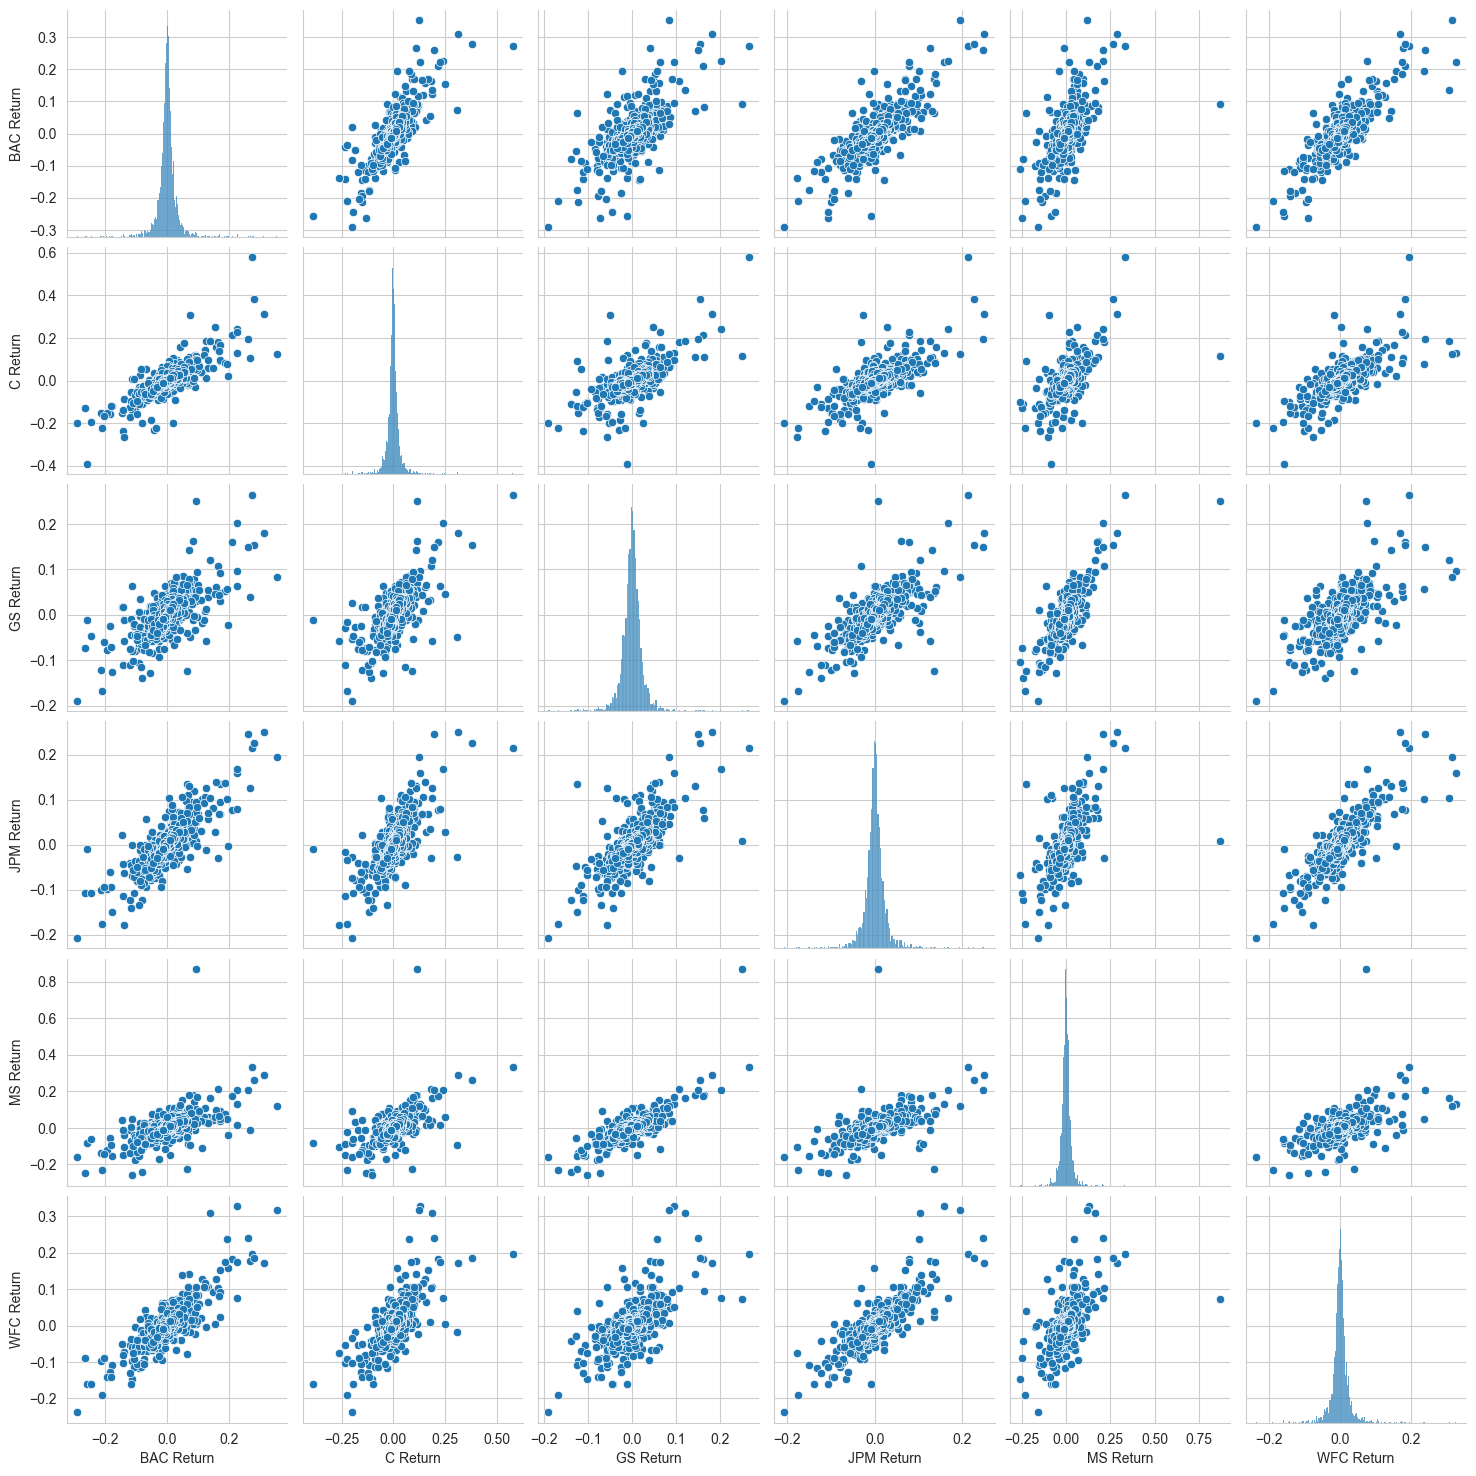

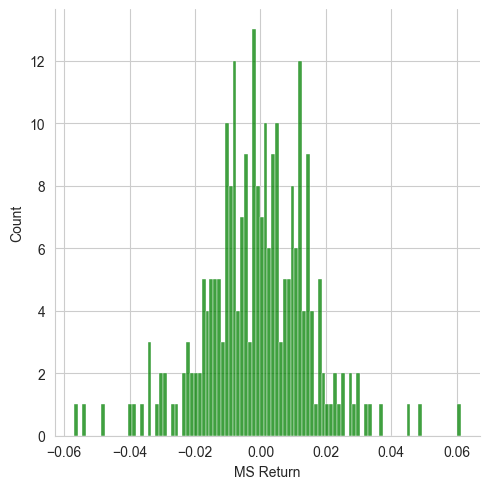

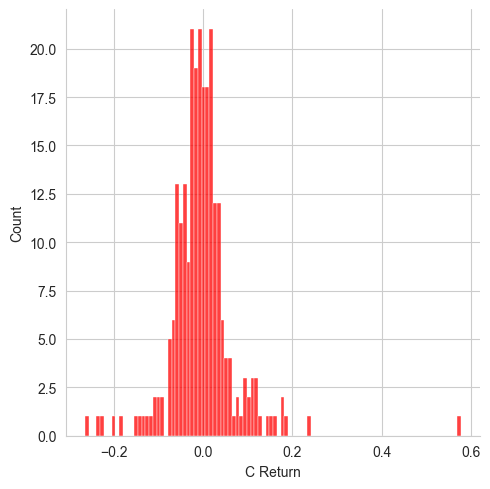

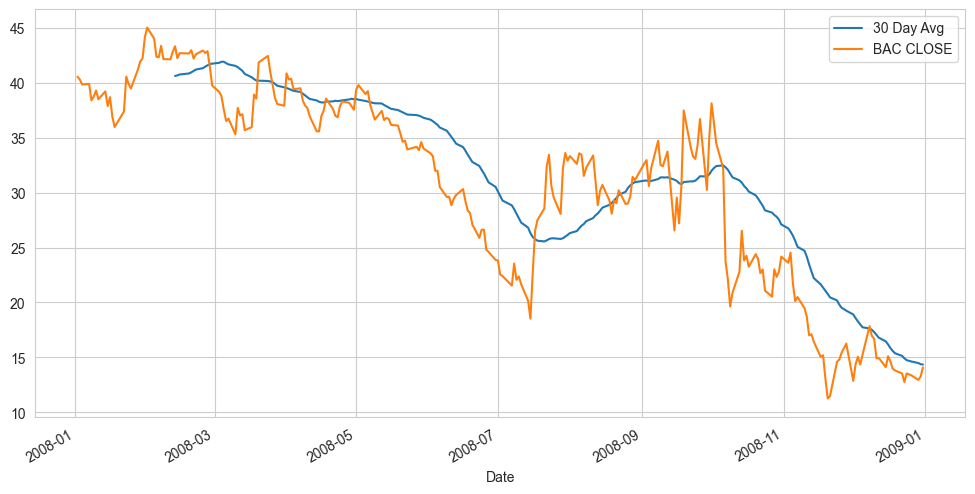

In [2]:
from sqlite3 import Date
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sbn
import datetime as dt
import matplotlib.pyplot as plt

sbn.set_style('whitegrid')
import plotly
import cufflinks as cf
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
cf.go_offline()

start = dt.datetime(2006, 1, 1)
end = dt.datetime(2018, 1, 1)

# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

# print(MS.head())


tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

'''Using pd.concat to concatenate the bank dataframes together to a single data 
frame called bank_stocks. Set the keys argument equal to the tickers list.'''

bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

# Setting up the column name levels 
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
# bank_stocks.index.names = ['Bank Ticker']  --> for changing the multi-index

print(bank_stocks.head())      #************


# What is the max Close price for each bank's stock throughout the period?

Max_close_price= bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()
print(Max_close_price)     #************

# Create a new empty DataFrame called returns which will contain the returns for each bank's stock

returns = pd.DataFrame()

'''We can use pandas pct_change() method on the Close column to create a column representing
this return value. Create a 'for' loop that goes and for each Bank Stock Ticker creates this
returns column and set's it as a column in the returns DataFrame.'''

for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()

print(returns.head())    #**************

# ** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**
#returns[1:]

plot = sbn.pairplot(returns[1:])
# print(plot)    #**************
plt.savefig("Plot_compare_all.png")    #****************Plots the graphs and save the image formed****************


# ***Worst day according to returns for each bank***
Worst_day= returns.idxmin()
print(Worst_day)   #**************
Best_day = returns.idxmax()
print(Best_day)   #**************


# ***Standart deviation of the returns to see the riskiest stock over the entire time period***
S_dev = returns.std()
print(S_dev)    # ************

# For standard deviation in a particular time interval
S_dev2 = returns.loc['2015-01-01':'2015-12-31'].std()
print(S_dev2) # ************


# *** Create a displot using seaborn of the 2015 returns for Morgan Stanley***
Displot_MS = sbn.displot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)
# print(Displot_MS)   #****************

plt.savefig("Plot_MS.png")     #****************Plots the required graphs

# Displot of 2008 returns for CitiGroup
Displot_C = sbn.displot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)
# print(Displot_C)   #****************

plt.savefig("Plot_C.png")     #****************Plots the required graphs



#*****************MORE VISUALIZATIONS***********************


# *** To create a line plot showing Close price for each bank for the entire index of time.

# bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()
# plt.savefig("Plot_Close_Price.png")   #****************Plots the required graphs

bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()
plt.savefig("Plot_Close_Price2.png")   #****************Plots the smart graph


#**********MOVING AVERAGES***********

# ***Plotting the rolling 30 day average against the close price for bank of America's stock for year 2008
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()
plt.savefig("Plot_MA.png")  #****************Plots the MA graph



# *** Create a candle plot of Bank of America's stock from from Jan 1st 2015 to Jan 1st 2016

BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')
plt.savefig("Plot_Candle_Sticks.png")  #****************Plots the candle stick graph



# ************Bollinger Band*************
# *** BB for BAC for the year 2015

BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')
plt.savefig("Plot_BB.png")  #****************Plots the BB graph



# **************************************************END*******************************************************